# Homework 06
your name: ______

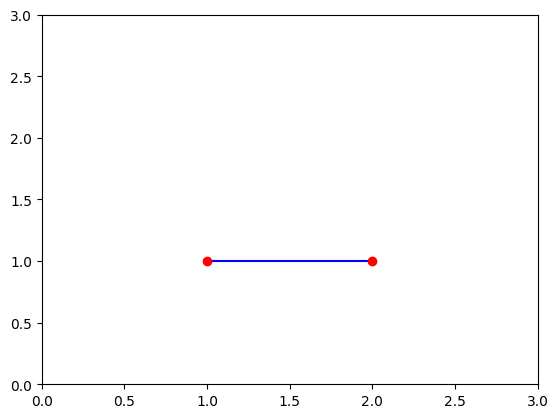

In [48]:
# this is how you can plot graphs:

%matplotlib inline
import matplotlib.pyplot as plt
import math
from collections import deque

plt.figure()
plt.plot((1,2),(1,1),'b-') # blue line, x1,x2,y1,y2
plt.plot((1,2),(1,1),'ro') # red dots
plt.xlim([0,3])
plt.ylim([0,3])
plt.show()


In [49]:
class Graph(object):
    """ Represents an undirected graph """

    def __init__(self, vertices, edges):
        """ A graph is defined by its set of vertices
           and its set of edges."""
        self.V = set(vertices) # The set of vertices
        self.E = set([])       # The set of edges
        self.adjacency_map = {}          # A dictionary that will hold the list
                               # of adjacent vertices for each vertex.
        self.vertex_coordinates = {}       # An optional dictionary that can hold coordinates
                               # for the vertices.
        self.edge_labels = {}  # a dictionary of labels for edges

        self.add_edges(edges)  # Note the call to add_edges will also
                               # update the adjacency_map dictionary
        print ('(Initializing a graph with %d vertices and %d edges)' % (len(self.V),len(self.E)))


    def add_vertices(self,vertex_list):
        """ This method will add the vertices in the vertex_list
            to the set of vertices for this graph. Since V is a
            set, duplicate vertices will not be added to V. """
        for v in vertex_list:
            self.V.add(v)
        self.build_adjacency_map()


    def add_edges(self,edge_list):
        """ This method will add a list of edges to the graph
            It will insure that the vertices of each edge are
            included in the set of vertices (and not duplicated).
            It will also insure that edges are added to the
            list of edges and not duplicated. """
        for s,t in edge_list:
            if (s,t) not in self.E and (t,s) not in self.E:
                self.V.add(s)
                self.V.add(t)
                self.E.add((s,t))
        self.build_adjacency_map()


    def build_adjacency_map(self):
        self.adjacency_map = {}
        for v in self.V:
            self.adjacency_map[v] = []
        for (s,t) in self.E:
            self.adjacency_map[s].append(t)
            self.adjacency_map[t].append(s)


    def degree_of(self, vertex):
        """ return the degree of the given vertex """
        if vertex in self.V:
            return len(self.adjacency_map[vertex])
        else:
            return None


    def get_a_vertex(self):
        """ returns some vertex of the graph """
        for v in self.V:
            return v
        return None


    def plot(self):
        nV = len(self.V)
        if len(self.vertex_coordinates) != nV:
            # Coordinates have not been specified for every vertex, put them on a circle
            dTheta = 2*math.pi/nV
            k = 0
            for v in self.V:
                self.vertex_coordinates[v] = (10*math.cos(math.pi/2-k*dTheta),10*math.sin(math.pi/2-k*dTheta))
                k += 1
        px = []
        py = []
        for v in self.V:
            px.append(self.vertex_coordinates[v][0])
            py.append(self.vertex_coordinates[v][1])
        plt.plot(px,py,'bo')
        for vertex in self.V:
            p = self.vertex_coordinates[vertex]
            pq = max(0.1,math.sqrt(p[0]**2 + p[1]**2))
            rx = p[0]/pq
            ry = p[1]/pq
            plt.text(p[0]+0.2*rx, p[1]+0.2*ry, str(vertex))
        for s,t in self.E:
            plt.plot([self.vertex_coordinates[s][0], self.vertex_coordinates[t][0]],
                     [self.vertex_coordinates[s][1], self.vertex_coordinates[t][1]], 'b')
            if (s,t) in self.edge_labels:
                label = self.edge_labels[(s,t)]
                plt.text((self.vertex_coordinates[s][0]+self.vertex_coordinates[t][0])/2-0.1,
                         (self.vertex_coordinates[s][1]+self.vertex_coordinates[t][1])/2-0.1, label)
        plt.xlim(min(px)-1.0, max(px)+1.1)
        plt.ylim(min(py)-1.0, max(py)+1.1)

    def get_a_component_spanning_tree(self, root):
        """ This routine uses a breadth-first search
        to obtain a tree that spans the component
        containing root """
        spanning_tree = []
        visited = {}
        for v in self.V:
            visited[v] = False
        Q = deque()
        visited[root] = True
        Q.append(root)
        while len(Q) > 0:
            v = Q.popleft()
            for u in self.adjacency_map[v]:
                if not visited[u]:
                    visited[u] = True
                    Q.append(u)
                    spanning_tree.append((v,u))
        return spanning_tree


    def is_connected(self):
        """ If the graph is connected then if the tree
        returned by get_a_component_spanning_tree has
        nV-1 edges - that is, it spans the graph."""
        root = self.get_a_vertex()
        tree = self.get_a_component_spanning_tree(root)
        if len(tree) == len(self.V)-1:
            return True
        else:
            return False

(Initializing a graph with 6 vertices and 7 edges)
Vertices: {'C', 'E', 'F', 'B', 'A', 'D'}
Edges: {('C', 'D'), ('C', 'E'), ('A', 'F'), ('B', 'D'), ('C', 'F'), ('A', 'E'), ('E', 'B')}
adjacency: {'C': ['D', 'E', 'F'], 'E': ['C', 'A', 'B'], 'F': ['A', 'C'], 'B': ['D', 'E'], 'A': ['F', 'E'], 'D': ['C', 'B']}
spanning tree of F [('A', 'F'), ('A', 'E'), ('F', 'C'), ('E', 'B'), ('C', 'D')]
Is G1 connected? True


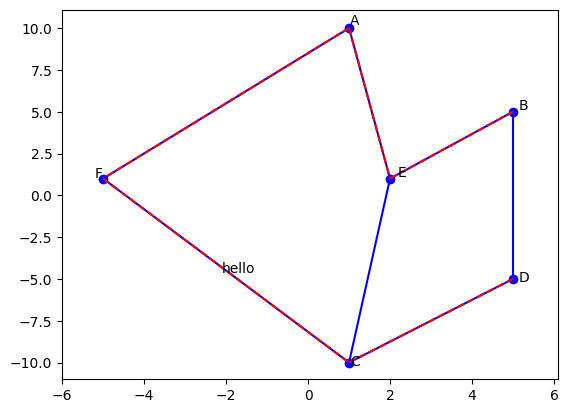

In [50]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [('A','E'),('C','F'),('B','D'),('A','F'),('C','E'),('C','D'),('E','B')]
G1 = Graph(V,E)
print ('Vertices:',G1.V)
print ('Edges:',G1.E)
print ('adjacency:',G1.adjacency_map)
G1.edge_labels[('C','F')] = "hello"

G1.vertex_coordinates = {'A':(1,10),'B':(5,5),'C':(1,-10),'D':(5,-5),'E':(2,1),'F':(-5,1)}
G1.plot()
tree = G1.get_a_component_spanning_tree('A')
print ("spanning tree of F",tree)

print ("Is G1 connected?", G1.is_connected())
#
for edge in tree:
    s,t = edge
    xs,ys = G1.vertex_coordinates[s]
    xt,yt = G1.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')


In [51]:
class PriorityQueue():
    '''
    The arguments passed to a PriorityQueue must consist of
    a priority and an object.  It must be possible to compare
    priorities using the < operator.
    
    push(x) adds x to the priority queue
    pop() removes and return the item with the smallest value
    '''

    def __init__(self):
        self._pq = []

    def _parent(self,n):
        return (n-1)//2

    def _leftchild(self,n):
        return 2*n + 1

    def _rightchild(self,n):
        return 2*n + 2

    def push(self, priority, object):
        self._pq.append((priority, object))
        n = len(self._pq)
        self._bubble_up(n-1)

    def _bubble_up(self,c):
        while 0<c:
            c_item = self._pq[c]
            p = self._parent(c)
            p_item = self._pq[p]
            if c_item < p_item:
                self._pq[p] = c_item
                self._pq[c] = p_item
                c = p
            else:
                break

    def pop(self):
        n = len(self._pq)
        if n==0:
            obj = None
        elif n==1:
            pri,obj = self._pq.pop()
        else:
            pri,obj = self._pq[0]
            self._pq[0] = self._pq.pop()
            self._sift_down(0)
        return obj

    def _sift_down(self,p):
        n = len(self._pq)
        while p<n:
            p_item = self._pq[p]
            lc = self._leftchild(p)
            if n <= lc:
                break
            c_item = self._pq[lc]
            c = lc
            rc = self._rightchild(p)
            if rc < n:
                r_item = self._pq[rc]
                if r_item < c_item:
                    c_item = r_item
                    c = rc
            if p_item <= c_item:
                break
            self._pq[p] = c_item
            self._pq[c] = p_item
            p = c

    def is_empty(self):
        return 0 == len(self._pq)
    

In [52]:
def Kruskal_version1(G, weights):
    ''' Uses the Kruskal algorithm to find the minimum
        weighted tree of a connected graph.
        If the graph is not connected, the algorithm will
        return the minimum weighted forest.

        G is the graph, and weights is a dictionary of edges and their weights.
        The edges are the keys of the dictionary and the weights are the values.

        Version 1 (not efficient)
    '''

    PQ = PriorityQueue()
    for edge in weights:
        w = weights[edge]
        PQ.push(w,edge)
    color = {}
    for vertex in G.V:
        color[vertex] = 0
    nV = len(G.V)
    next_color = 1
    acyclic_subgraph = []
    weight = 0
    while not PQ.is_empty() and len(acyclic_subgraph)<(nV-1):
        edge = PQ.pop()
        s,t = edge
        if color[s] == 0 and color[t] == 0:
            #1. Add a new tree to the forest
            color[s] = next_color
            color[t] = next_color
            next_color += 1
            acyclic_subgraph.append(edge)
            weight += weights[edge]

        elif color[s] == 0 or color[t] == 0:
            #2. Add this edge to the existing tree
            if color[s] == 0:
                color[s] = color[t]
            else:
                color[t] = color[s]
            acyclic_subgraph.append(edge)
            weight += weights[edge]

        elif color[s] == color[t]:
            #3. Skip this edge since it would form a cycle
            pass

        else: # color[s] != 0, color[t] != 0, and color[s] != color[t]
            #4. Graft one tree onto the other
            new_color = color[s]
            old_color = color[t]
            for v in G.V:
                #** Note that this step examines every vertex  ***
                #** each time one tree is grafted onto another ***
                if color[v] == old_color:
                    color[v] = new_color
            acyclic_subgraph.append(edge)
            weight += weights[edge]

    # We have examined all the edges and found the
    # largest minimum weighted acyclic subgraph.
    # If the graph is connected then it is the MST.
    return acyclic_subgraph, weight

(Initializing a graph with 6 vertices and 6 edges)
Minimum Spanning Tree: [('C', 'D'), ('B', 'D'), ('C', 'E'), ('A', 'E'), ('A', 'F')]


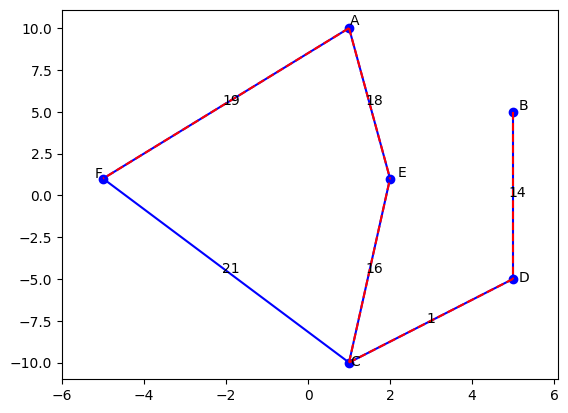

In [53]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [('A','E'),('C','F'),('B','D'),('A','F'),('C','E'),('C','D')]
W1 = {('A','E'):18, ('C','F'):21, ('B','D'):14, ('A','F'):19, ('C','E'):16, ('C','D'):1}
G1 = Graph(V,E)
G1.vertex_coordinates = {'A':(1,10),'B':(5,5),'C':(1,-10),'D':(5,-5),'E':(2,1),'F':(-5,1)}
G1.edge_labels = W1
G1.plot()

tree,weight = Kruskal_version1(G1,W1)
if len(tree)==(len(G1.V)-1):
    print ('Minimum Spanning Tree:',tree)
else:
    print ('Disconnected Acyclic Subgraph:',tree)
    print ('Weight:',weight)
for edge in tree:
    s,t = edge
    xs,ys = G1.vertex_coordinates[s]
    xt,yt = G1.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')


(Initializing a graph with 6 vertices and 7 edges)
Minimum Spanning Tree (MST): [('A', 'B'), ('C', 'D'), ('B', 'D'), ('C', 'E'), ('A', 'F')]
Weight: 69


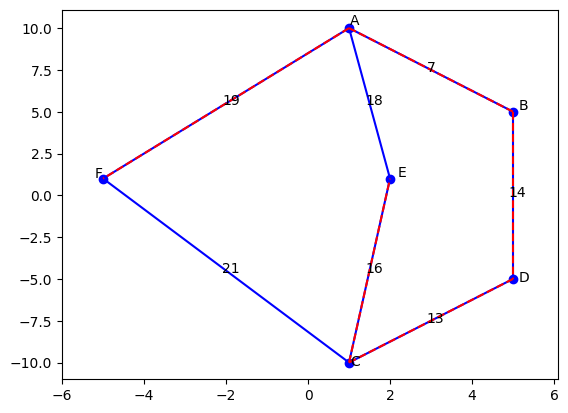

In [54]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [('A','B'),('A','E'),('C','F'),('B','D'),('C','D'),('A','F'),('C','E')]
W1 = {('A','B'):7, ('A','E'):18, ('C','F'):21, ('C','D'):13, ('B','D'):14, ('A','F'):19, ('C','E'):16}
G1 = Graph(V,E)
G1.vertex_coordinates = {'A':(1,10),'B':(5,5),'C':(1,-10),'D':(5,-5),'E':(2,1),'F':(-5,1)}
G1.edge_labels = W1
G1.plot()

tree,weight = Kruskal_version1(G1,W1)
if len(tree)==(len(G1.V)-1):
    print ('Minimum Spanning Tree (MST):',tree)
else:
    print ('Disconnected Acyclic Subgraph or MSF:',tree)
print ('Weight:',weight)
for edge in tree:
    s,t = edge
    xs,ys = G1.vertex_coordinates[s]
    xt,yt = G1.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')

## Question 1
1. implement print_tree() that prints a line of text for each vertex v with arrows how you reach the root if you use find_set(v). Example (from problem above):
```
A -> B -> D -> E -> F
C -> D -> E -> F
```
2. Implement a function height() that returns the height of the tallest tree (number of *edges* in the longest chain in the function print_tree())
3. Improve the function print_sets() to print each disjoint set grouped using parentheses like this:
```
(A D C) (B) (E F)
```

In [55]:
class DisjointSet(object):
    class LinkItem(object):
        def __init__(self, x):
            self.item = x
            self.parent = None
            
    def __init__(self):
        self.links = {} # maps each item to its Link structure
        
    def insert(self, vertices):
        """ insert the given vertices as isolated sets """
        for v in vertices:
            self.links[v] = self.LinkItem(v)
    
    def find(self, s):
        """ return a representative of the set s is in (find and return the root of the tree) """
        l = self.links[s]
        while l.parent != None:
            l = l.parent
        return l.item
    
    def union(self, s, t):
        """ take the union of the sets that contain s and t """
        root_s = self.find(s)
        root_t = self.find(t)
        if root_s != root_t:
            # attach root(s) to root(t):
            self.links[root_s].parent = self.links[root_t]
        
    def print_sets(self):        
        sets = {}
        for item in self.links:
            sets[item] = []
        for item in self.links:
            root = self.find(item)
            sets[root].append(item)

        for key in sets.keys():
            if len(sets[key]) != 0:
                print("(",end=" ")
                for item in sets[key]:
                    print(item,end=" ")
                print(") ",end=" ")
            
        print("")
        
    def print_tree(self):
        for item in self.links:
            root = self.find(item)
            temp = item
            while root != temp:
                print(f"{temp} ->", end=" ")
                temp = self.links[temp].parent.item
            print(root)
        
    def height(self):
        # TODO
        height = -1
        for item in self.links:
            root = self.find(item)
            temp = item
            counttemp = 0
            while root != temp:
                temp = self.links[temp].parent.item
                counttemp += 1
            height = max(height,counttemp)
        return height
    
    
ds = DisjointSet()
ds.insert(["A","B","C","D","X"])
ds.print_sets() # A B C D X 
ds.union("A","C")
ds.print_sets() # A(parent=C) B C D X
ds.union("D","C")
ds.print_sets() # A(parent=C) B C D(parent=C) X 
ds.union("A","B")
ds.print_sets() # A(parent=C) B C(parent=B) D(parent=C) X
ds.print_tree()
print("find(A): ", ds.find("A"))
print("A joined with C?", ds.find("A")==ds.find("C"))
print("B joined with X?", ds.find("B")==ds.find("X"))
print ("height (should be 2): ",ds.height())
        

( A )  ( B )  ( C )  ( D )  ( X )  
( B )  ( A C )  ( D )  ( X )  
( B )  ( A C D )  ( X )  
( A B C D )  ( X )  
A -> C -> B
B
C -> B
D -> C -> B
X
find(A):  B
A joined with C? True
B joined with X? False
height (should be 2):  2


In [56]:
def KruskalDisjointSet(G, W, ds):
    ''' Uses the Kruskal algorithm to find the minimum
        weighted tree of a connected graph.
        If the graph is not connected, the algorithm will
        return the minimum weighted forest.

        G is the graph, and W is a dictionary of edges and their weights, 
        ds is an empty DisjointSet
    '''

    PQ = PriorityQueue()
    for edge in W:
        weight = W[edge]
        PQ.push(weight, edge)
    
    # initialize disjoint set:
    ds.insert(G.V)
    
    acyclic_subgraph = []
    weight = 0
    n_v = len(G.V)
    while not PQ.is_empty() and len(acyclic_subgraph)<(n_v-1):
        edge = PQ.pop()
        s,t = edge
        if ds.find(s) != ds.find(t):
            # s and t are in different sets
            ds.union(s,t)
            acyclic_subgraph.append(edge)
            weight += W[edge]

    return acyclic_subgraph, weight

(Initializing a graph with 6 vertices and 7 edges)
( C E F B A D )  
C -> D -> E -> F
E -> F
F
B -> D -> E -> F
A -> B -> D -> E -> F
D -> E -> F
height: 4


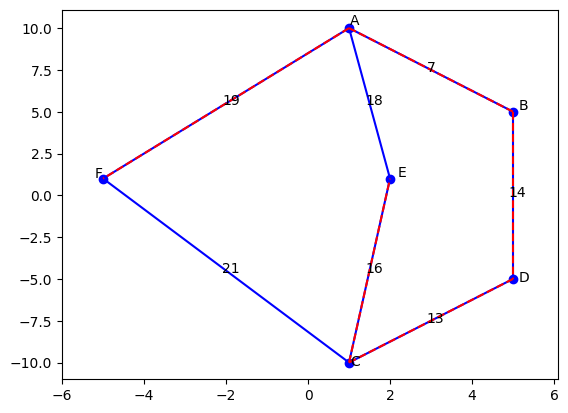

In [57]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [('A','B'),('A','E'),('C','F'),('B','D'),('C','D'),('A','F'),('C','E')]
W1 = {('A','B'):7, ('A','E'):18, ('C','F'):21, ('C','D'):13, ('B','D'):14, ('A','F'):19, ('C','E'):16}
G1 = Graph(V,E)
G1.vertex_coordinates = {'A':(1,10),'B':(5,5),'C':(1,-10),'D':(5,-5),'E':(2,1),'F':(-5,1)}
G1.edge_labels = W1
G1.plot()

ds = DisjointSet()
tree,weight = KruskalDisjointSet(G1,W1,ds)
for edge in tree:
    s,t = edge
    xs,ys = G1.vertex_coordinates[s]
    xt,yt = G1.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')

ds.print_sets()
ds.print_tree()
print ("height:", ds.height())

## Question 2
Implement a class DisjointSetWeightedQuickUnion (by copying DisjointSet) that keeps track of the rank (height of the tree of each root node) and attaches the smaller to the taller tree in the union operation. Execute the block below, check the result is correct, and notice that the maximum height reported is much smaller.
*Note*: We are passing the disjoint set as the last argument into the Kruskal algorithm so our new implentation will be used here.

In [58]:
class DisjointSetWeightedQuickUnion(object):
    # TODO
    class LinkItem(object):
        def __init__(self, x):
            self.item = x
            self.parent = None
            self.height = 0
            
    def __init__(self):
        self.links = {} # maps each item to its Link structure
        
    def insert(self, vertices):
        """ insert the given vertices as isolated sets """
        for v in vertices:
            self.links[v] = self.LinkItem(v)
    
    def find(self, s):
        """ return a representative of the set s is in (find and return the root of the tree) """
        l = self.links[s]
        while l.parent != None:
            l = l.parent
        return l.item
    
    def union(self, s, t):
        """ take the union of the sets that contain s and t """
        root_s = self.find(s)
        root_t = self.find(t)
        
        if self.links[root_s].height <= self.links[root_t].height:
            self.links[root_s].parent = self.links[root_t]
            self.links[root_s].parent.height += 1
        else:
            self.links[root_t].parent = self.links[root_s]
            self.links[root_t].parent.height += 1
        
    def print_sets(self):        
        sets = {}
        for item in self.links:
            sets[item] = []
        for item in self.links:
            root = self.find(item)
            sets[root].append(item)

        for key in sets.keys():
            if len(sets[key]) != 0:
                print("(",end=" ")
                for item in sets[key]:
                    print(item,end=" ")
                print(") ",end=" ")
            
        print("")
        
    def print_tree(self):
        for item in self.links:
            root = self.find(item)
            temp = item
            while root != temp:
                print(f"{temp} ->", end=" ")
                temp = self.links[temp].parent.item
            print(root)
        
    def height(self):
        # TODO
        height = -1
        for item in self.links:
            root = self.find(item)
            temp = item
            counttemp = 0
            while root != temp:
                temp = self.links[temp].parent.item
                counttemp += 1
            height = max(height,counttemp)
        return height
    pass

(Initializing a graph with 6 vertices and 7 edges)
C -> D
E -> D
F -> D
B -> D
A -> B -> D
D
height: 2


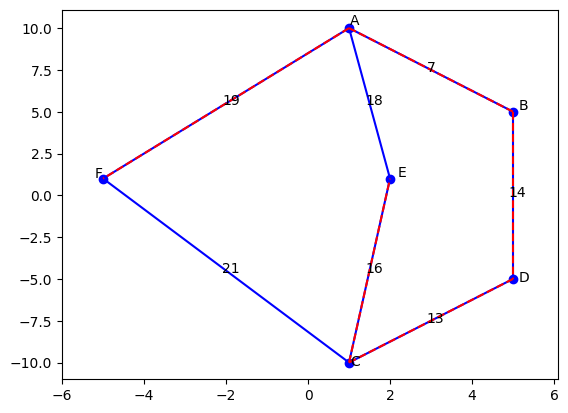

In [59]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [('A','B'),('A','E'),('C','F'),('B','D'),('C','D'),('A','F'),('C','E')]
W1 = {('A','B'):7, ('A','E'):18, ('C','F'):21, ('C','D'):13, ('B','D'):14, ('A','F'):19, ('C','E'):16}
G1 = Graph(V,E)
G1.vertex_coordinates = {'A':(1,10),'B':(5,5),'C':(1,-10),'D':(5,-5),'E':(2,1),'F':(-5,1)}
G1.edge_labels = W1
G1.plot()

ds = DisjointSetWeightedQuickUnion()
tree,weight = KruskalDisjointSet(G1,W1,ds)
for edge in tree:
    s,t = edge
    xs,ys = G1.vertex_coordinates[s]
    xt,yt = G1.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')

ds.print_tree()
print ("height:", ds.height())

## Question 3: A more complicated example
Find a minimum spanning tree and draw it. Compare the height of the disjoint set of  the version with and without quick union.

(Initializing a graph with 23 vertices and 37 edges)
height: 3
height: 6


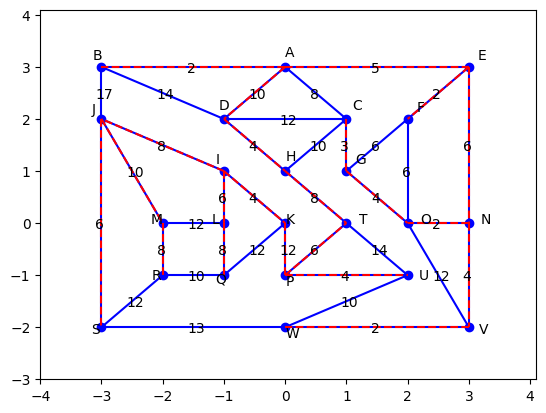

In [60]:
WPM =  {('A', 'B'):  2, ('A', 'C'):  8, ('A', 'D'): 10, ('A', 'E'):  5,\
  ('B', 'D'): 14, ('B', 'J'): 17, ('C', 'D'): 12, ('C', 'G'):  3,\
  ('C', 'H'): 10, ('D', 'H'):  4, ('E', 'F'):  2, ('E', 'N'):  6,\
  ('F', 'G'):  6, ('F', 'O'):  6, ('G', 'O'):  4, ('H', 'T'):  8,\
  ('I', 'J'):  8, ('I', 'K'):  4, ('I', 'L'):  6, ('J', 'M'): 10,\
  ('J', 'S'):  6, ('K', 'P'): 12, ('K', 'Q'): 12, ('L', 'M'): 12,\
  ('L', 'Q'):  8, ('M', 'R'):  8, ('N', 'O'):  2, ('N', 'V'):  4,\
  ('O', 'V'): 12, ('P', 'T'):  6, ('P', 'U'):  4, ('Q', 'R'): 10,\
  ('R', 'S'): 12, ('S', 'W'): 13, ('T', 'U'): 14, ('U', 'W'): 10,\
  ('V', 'W'):  2 }
PMV = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','S','T','U','V','W']
PMcoord = {'B':(-3,3),'A':(0,3),'E':(3,3)}
PMcoord['J']=(-3,2); PMcoord['D']=(-1,2); PMcoord['C']=(1,2); PMcoord['F']=(2,2)
PMcoord['I']=(-1,1); PMcoord['H']=(0,1); PMcoord['G']=(1,1)
PMcoord['M']=(-2,0); PMcoord['L']=(-1,0); PMcoord['K']=(0,0); PMcoord['T']=(1,0); PMcoord['O']=(2,0); PMcoord['N']=(3,0)
PMcoord['R']=(-2,-1); PMcoord['Q']=(-1,-1); PMcoord['P']=(0,-1); PMcoord['U']=(2,-1)
PMcoord['S']=(-3,-2); PMcoord['W']=(0,-2); PMcoord['V']=(3,-2)
PMG = Graph([],WPM.keys())
PMG.vertex_coordinates = PMcoord
PMG.edge_labels = WPM

PMG.plot()

ds = DisjointSetWeightedQuickUnion()
tree,weight = KruskalDisjointSet(PMG,WPM,ds)
for edge in tree:
    s,t = edge
    xs,ys = PMG.vertex_coordinates[s]
    xt,yt = PMG.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')
print ("height:", ds.height())

ds2 = DisjointSet()
tree,weight = KruskalDisjointSet(PMG,WPM,ds2)
print ("height:", ds2.height())

# Question 4: No unique MST
Construct a graph that does not have a unique MST (it necessarily has two edges with the same weight). You can modify the graph in question 2. Run Kruskals algorithm. Does it work? If yes, visualize the result.

(Initializing a graph with 6 vertices and 7 edges)
Clearly the graph below could have edge (AE) or (CE) without a change in MSE


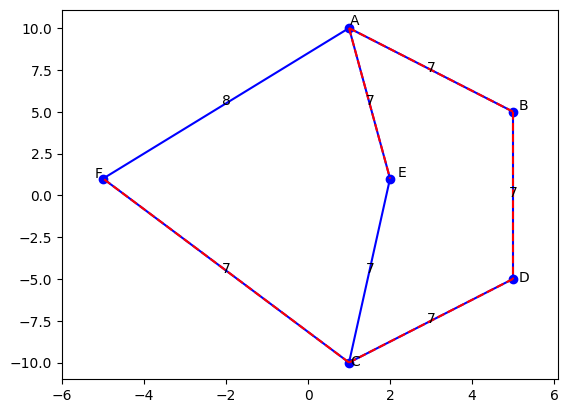

In [61]:
V = ['A', 'B', 'C', 'D', 'E', 'F']
E = [('A','B'),('A','E'),('C','F'),('B','D'),('C','D'),('A','F'),('C','E')]
W1 = {('A','B'):7, ('A','E'):7, ('C','F'):7, ('C','D'):7, ('B','D'):7, ('A','F'):8, ('C','E'):7}
G1 = Graph(V,E)
G1.vertex_coordinates = {'A':(1,10),'B':(5,5),'C':(1,-10),'D':(5,-5),'E':(2,1),'F':(-5,1)}
G1.edge_labels = W1
G1.plot()

ds = DisjointSetWeightedQuickUnion()
tree,weight = KruskalDisjointSet(G1,W1,ds)
for edge in tree:
    s,t = edge
    xs,ys = G1.vertex_coordinates[s]
    xt,yt = G1.vertex_coordinates[t]
    plt.plot([xs,xt],[ys,yt],'r--')

print ("Clearly the graph below could have edge (AE) or (CE) without a change in MSE")